***Import of all the required libraries***



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.metrics import f1_score
import tensorflow as tf
import pathlib
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image as image_utils

In [4]:
%pip install zenodo_get # getting the dataset

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/126.8 kB ? eta -:--:--
   --------- ------------------------------ 30.7/126.8 kB 1.3 MB/s eta 0:00:01
   ----------------------------- ---------- 92.2/126.8 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 126.8/126.8 kB 1.1 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=d07ffbc634bbca815bff4053dc8c2af4c9df88463ffcaf4a3dce971a2afbed12
  Stored in directory: c:\users\shivam\appdata\local\pip\cache\wheels\01\46\3b\e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [5]:
!zenodo_get 10.5281/zenodo.3904280 #downloading dataset

Title: FETAL_PLANES_DB: Common maternal-fetal ultrasound images
Keywords: medical imaging, fetal images, ultrasound
Publication date: 2020-06-23
DOI: 10.5281/zenodo.3904280
Total size: 2.1 GB

Link: https://zenodo.org/records/3904280/files/FETAL_PLANES_ZENODO.zip   size: 2.1 GB

Checksum is correct. (2a5fcc2cefb789bcc0f6c1f73e0ea43f)
All files have been downloaded.


In [6]:
!unzip "FETAL_PLANES_ZENODO.zip" #unziping dataset to use the csv

'unzip' is not recognized as an internal or external command,
operable program or batch file.


***Import the csv of the dataset***

In [2]:
df = pd.read_csv("FETAL_PLANES_DB_data.csv", sep=";")

In [3]:
df

,Image_name,Patient_num,Plane,Brain_plane,Operator,US_Machine,Train
0,Patient00001_Plane1_1_of_15,1,Other,Not A Brain,Other,Aloka,1
1,Patient00001_Plane1_2_of_15,1,Other,Not A Brain,Other,Aloka,1
2,Patient00001_Plane1_3_of_15,1,Other,Not A Brain,Other,Aloka,1
3,Patient00001_Plane1_4_of_15,1,Other,Not A Brain,Other,Aloka,1
4,Patient00001_Plane1_5_of_15,1,Other,Not A Brain,Other,Aloka,1
...,...,...,...,...,...,...,...
12395,Patient01791_Plane5_1_of_1,1791,Fetal femur,Not A Brain,Other,Voluson S10,0
12396,Patient01792_Plane2_1_of_1,1792,Fetal abdomen,Not A Brain,Other,Voluson E6,0
12397,Patient01792_Plane3_1_of_1,1792,Fetal brain,Trans-thalamic,Other,Voluson E6,0
12398,Patient01792_Plane5_1_of_1,1792,Fetal femur,Not A Brain,Other,Voluson E6,0


In [4]:
df.dtypes

Image_name     object
Patient_num     int64
Plane          object
Brain_plane    object
Operator       object
US_Machine     object
Train           int64
dtype: object

In [5]:
df_train= df[df["Train "]==1]
df_test= df[df["Train "]==0]

In [6]:
df_train

,Image_name,Patient_num,Plane,Brain_plane,Operator,US_Machine,Train
0,Patient00001_Plane1_1_of_15,1,Other,Not A Brain,Other,Aloka,1
1,Patient00001_Plane1_2_of_15,1,Other,Not A Brain,Other,Aloka,1
2,Patient00001_Plane1_3_of_15,1,Other,Not A Brain,Other,Aloka,1
3,Patient00001_Plane1_4_of_15,1,Other,Not A Brain,Other,Aloka,1
4,Patient00001_Plane1_5_of_15,1,Other,Not A Brain,Other,Aloka,1
...,...,...,...,...,...,...,...
7501,Patient01225_Plane6_1_of_2,1225,Fetal thorax,Not A Brain,Op. 1,Voluson E6,1
7502,Patient01225_Plane6_2_of_2,1225,Fetal thorax,Not A Brain,Op. 1,Voluson E6,1
7503,Patient01226_Plane2_1_of_1,1226,Fetal abdomen,Not A Brain,Op. 1,Voluson E6,1
7504,Patient01226_Plane3_1_of_1,1226,Fetal brain,Trans-thalamic,Op. 1,Voluson E6,1


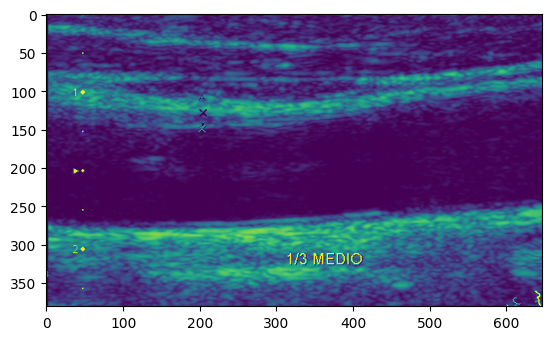

In [7]:
image = img.imread('Images/'+df.Image_name[(random.randint(0, len(df)))]+'.png')
plt.imshow(image)

In [8]:
df_train['Image_name'] = df_train['Image_name'].apply(lambda x : x + '.png' )
df_test['Image_name'] = df_test['Image_name'].apply(lambda x : x + '.png' )

C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_16928\728751466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Image_name'] = df_train['Image_name'].apply(lambda x : x + '.png' )
C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_16928\728751466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Image_name'] = df_test['Image_name'].apply(lambda x : x + '.png' )


In [9]:
df_train

,Image_name,Patient_num,Plane,Brain_plane,Operator,US_Machine,Train
0,Patient00001_Plane1_1_of_15.png,1,Other,Not A Brain,Other,Aloka,1
1,Patient00001_Plane1_2_of_15.png,1,Other,Not A Brain,Other,Aloka,1
2,Patient00001_Plane1_3_of_15.png,1,Other,Not A Brain,Other,Aloka,1
3,Patient00001_Plane1_4_of_15.png,1,Other,Not A Brain,Other,Aloka,1
4,Patient00001_Plane1_5_of_15.png,1,Other,Not A Brain,Other,Aloka,1
...,...,...,...,...,...,...,...
7501,Patient01225_Plane6_1_of_2.png,1225,Fetal thorax,Not A Brain,Op. 1,Voluson E6,1
7502,Patient01225_Plane6_2_of_2.png,1225,Fetal thorax,Not A Brain,Op. 1,Voluson E6,1
7503,Patient01226_Plane2_1_of_1.png,1226,Fetal abdomen,Not A Brain,Op. 1,Voluson E6,1
7504,Patient01226_Plane3_1_of_1.png,1226,Fetal brain,Trans-thalamic,Op. 1,Voluson E6,1


***Split the Dataset*** 

In [10]:
# Data Generator & augmentation 
datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

In [11]:
IMAGE_SIZE = (256, 256, 3)
IMAGE_SIZE[:-1]

(256, 256)

In [12]:
train_ds = datagen.flow_from_dataframe(dataframe=df_train,
                                       directory='Images',
                                       x_col = 'Image_name',
                                       y_col = 'Plane',
                                       subset='training',
                                       class_mode='categorical',
                                       color_mode='rgb',
                                       seed=43,
                                       target_size=IMAGE_SIZE[:-1],
                                       batch_size=32)

valid_ds = datagen.flow_from_dataframe(dataframe=df_train,
                                       directory='Images',
                                       x_col = 'Image_name',
                                       y_col = 'Plane',
                                       subset='validation',
                                       class_mode='categorical',
                                       color_mode='rgb',
                                       seed=43,
                                       target_size=IMAGE_SIZE[:-1],
                                       batch_size=32)
test_ds = datagen.flow_from_dataframe(dataframe=df_test,
                                       directory='Images',
                                       x_col = 'Image_name',
                                       class_mode=None,
                                       color_mode='rgb',
                                       target_size=IMAGE_SIZE[:-1],
                                       batch_size=32)

Found 5704 validated image filenames belonging to 6 classes.
Found 1425 validated image filenames belonging to 6 classes.
Found 5271 validated image filenames.


***Import of the Pre-trained Model***

In [13]:
# we will use the transfer learning Resnet50 model for our problem . 
resnet = ResNet50(
    input_shape = IMAGE_SIZE,
    weights = 'imagenet',
    include_top = False
)

In [14]:
resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [15]:
train_ds


In [16]:
resnet.trainable = False 
model = Sequential([resnet, 
                    Flatten(),
                    Dense(512, activation="relu"),
                    Dense(6, activation="softmax")])

In [17]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs=10,validation_data=valid_ds)

Epoch 1/10


c:\Users\SHIVAM\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 585s 3s/step - accuracy: 0.4006 - loss: 12.0386 - val_accuracy: 0.3340 - val_loss: 1.2409
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 559s 3s/step - accuracy: 0.6470 - loss: 1.2062 - val_accuracy: 0.4000 - val_loss: 1.5728
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 595s 3s/step - accuracy: 0.7486 - loss: 0.7451 - val_accuracy: 0.7544 - val_loss: 0.7451
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 628s 3s/step - accuracy: 0.7359 - loss: 0.7579 - val_accuracy: 0.2498 - val_loss: 2.1727
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 588s 3s/step - accuracy: 0.7723 - loss: 0.6395 - val_accuracy: 0.2982 - val_loss: 1.8030
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 594s 3s/step - accuracy: 0.7766 - loss: 0.6282 - val_accuracy: 0.5137 - val_loss: 1.1704
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 570s 3s/step - accuracy: 0.7915 - loss: 0.6342 - val_accuracy: 0.2351 - val_loss: 2.6129
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 541s 3s/step - accuracy: 0.7873 - loss: 0.5859 - val_accuracy: 0.58

***Model Evaluation***

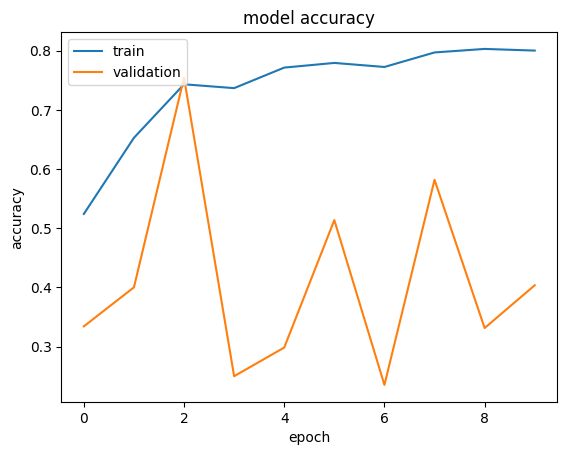

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

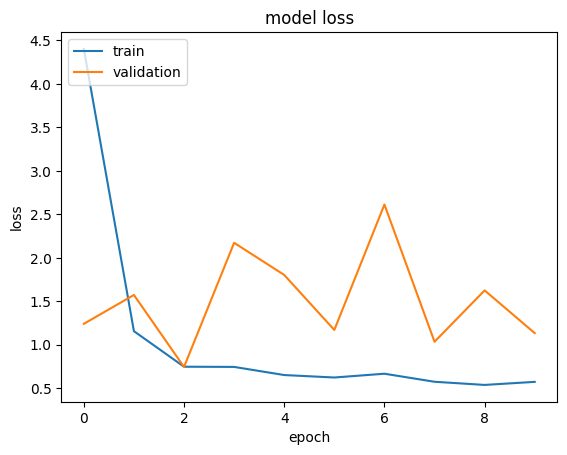

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
predictions = model.predict(test_ds).argmax(axis=1)

165/165 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step


In [21]:
train_ds.class_indices

{'Fetal abdomen': 0,
 'Fetal brain': 1,
 'Fetal femur': 2,
 'Fetal thorax': 3,
 'Maternal cervix': 4,
 'Other': 5}

In [22]:
print(len(predictions))

5271


In [23]:
predicted = np.array([list(train_ds.class_indices.keys())[i] for i in predictions])

In [24]:
predicted

array(['Maternal cervix', 'Fetal thorax', 'Fetal brain', ...,
       'Maternal cervix', 'Other', 'Fetal brain'], dtype='<U15')

***Making Predictions***

In [25]:
from tensorflow.keras.preprocessing import image
def test_image(path, image_name, model):
    img = image.load_img(path + image_name, target_size = IMAGE_SIZE)
    print('Original Image')
    plt.imshow(img)
    x = image.img_to_array(img)
    x = x / 255
    x = np.expand_dims(x, axis = 0)
    img_data = preprocess_input(x)
    a = np.argmax(model.predict(img_data), axis = 1)
    class_names=list(train_ds.class_indices.keys())
    print("the predicted class is : ", class_names[int(a)])
    

Original Image
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
the predicted class is :  Other


C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_16928\1509336525.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("the predicted class is : ", class_names[int(a)])


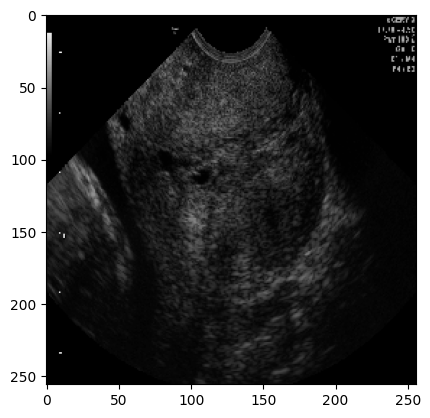

In [26]:
for i in df_test['Image_name'].sample():
  test_image("Images/",i,model)